## Netflix data Visualisation


![](https://www.91-cdn.com/hub/wp-content/uploads/2020/11/Netflix-.jpg?tr=w-781)


Source: https://www.91-cdn.com/hub/wp-content/uploads/2020/11/Netflix-.jpg?tr=w-781


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center"> Introduction</p>
</div>



This data visualisation assessment uses Netflix data as a case study. The Netflix Titles dataset is available on the Kaggle website. The dataset contains information about movies and TV shows from 1925 to 2021. It contains 7,787 entries and 12 features. This study aims to carry out an in-depth analysis and effectively communicate key findings and insights using data visualisation and storytelling. The features in the dataset are:



## <b> 1.1. Attribute Information </b>
1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

In [5]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pycountry_convert as pc
import missingno as msno
import squarify
from matplotlib.backends.backend_pdf import PdfPages
import plotly.express as px
import matplotlib.colors
#from sklearn.preprocessing import MultiLabelBinarize

import warnings
warnings.filterwarnings("ignore")

In [6]:
# reading the dfset in pandas dfframe
data = pd.read_csv(r'C:\Users\CHUKS\Documents\YSJ\Second Semester\Visualization\Assessment\Data\netflix_titles.csv')

# creating a copy of the dataset
df = data.copy()


In [7]:
# displaying the first five rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [8]:
# Count occurrences of "Season" (case-insensitive)
season_count = df['duration'].str.contains('Season', case=False).sum()

# Count occurrences of "Seasons" (case-insensitive)
seasons_count = df['duration'].str.contains('Seasons', case=False).sum()

print(f"Number of occurrences of 'Season': {season_count}")
print(f"Number of occurrences of 'Seasons': {seasons_count}")

Number of occurrences of 'Season': 2410
Number of occurrences of 'Seasons': 802


In [9]:
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy : 1.26.4
pandas : 2.2.2
seaborn : 0.13.2
matplotlib : 3.8.4


For clean visualization,set matplotlib config.

In [11]:
# number of rows and columns in the dfset
print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe contains 7787 rows and 12 columns


In [12]:
# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
# total number of null values per column
df.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
# percentage of missing values in each column
missing_Value_percent = ((df.isna().sum()/len(df)*100).round(1))
missing_Value_percent

show_id          0.0
type             0.0
title            0.0
director        30.7
cast             9.2
country          6.5
date_added       0.1
release_year     0.0
rating           0.1
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

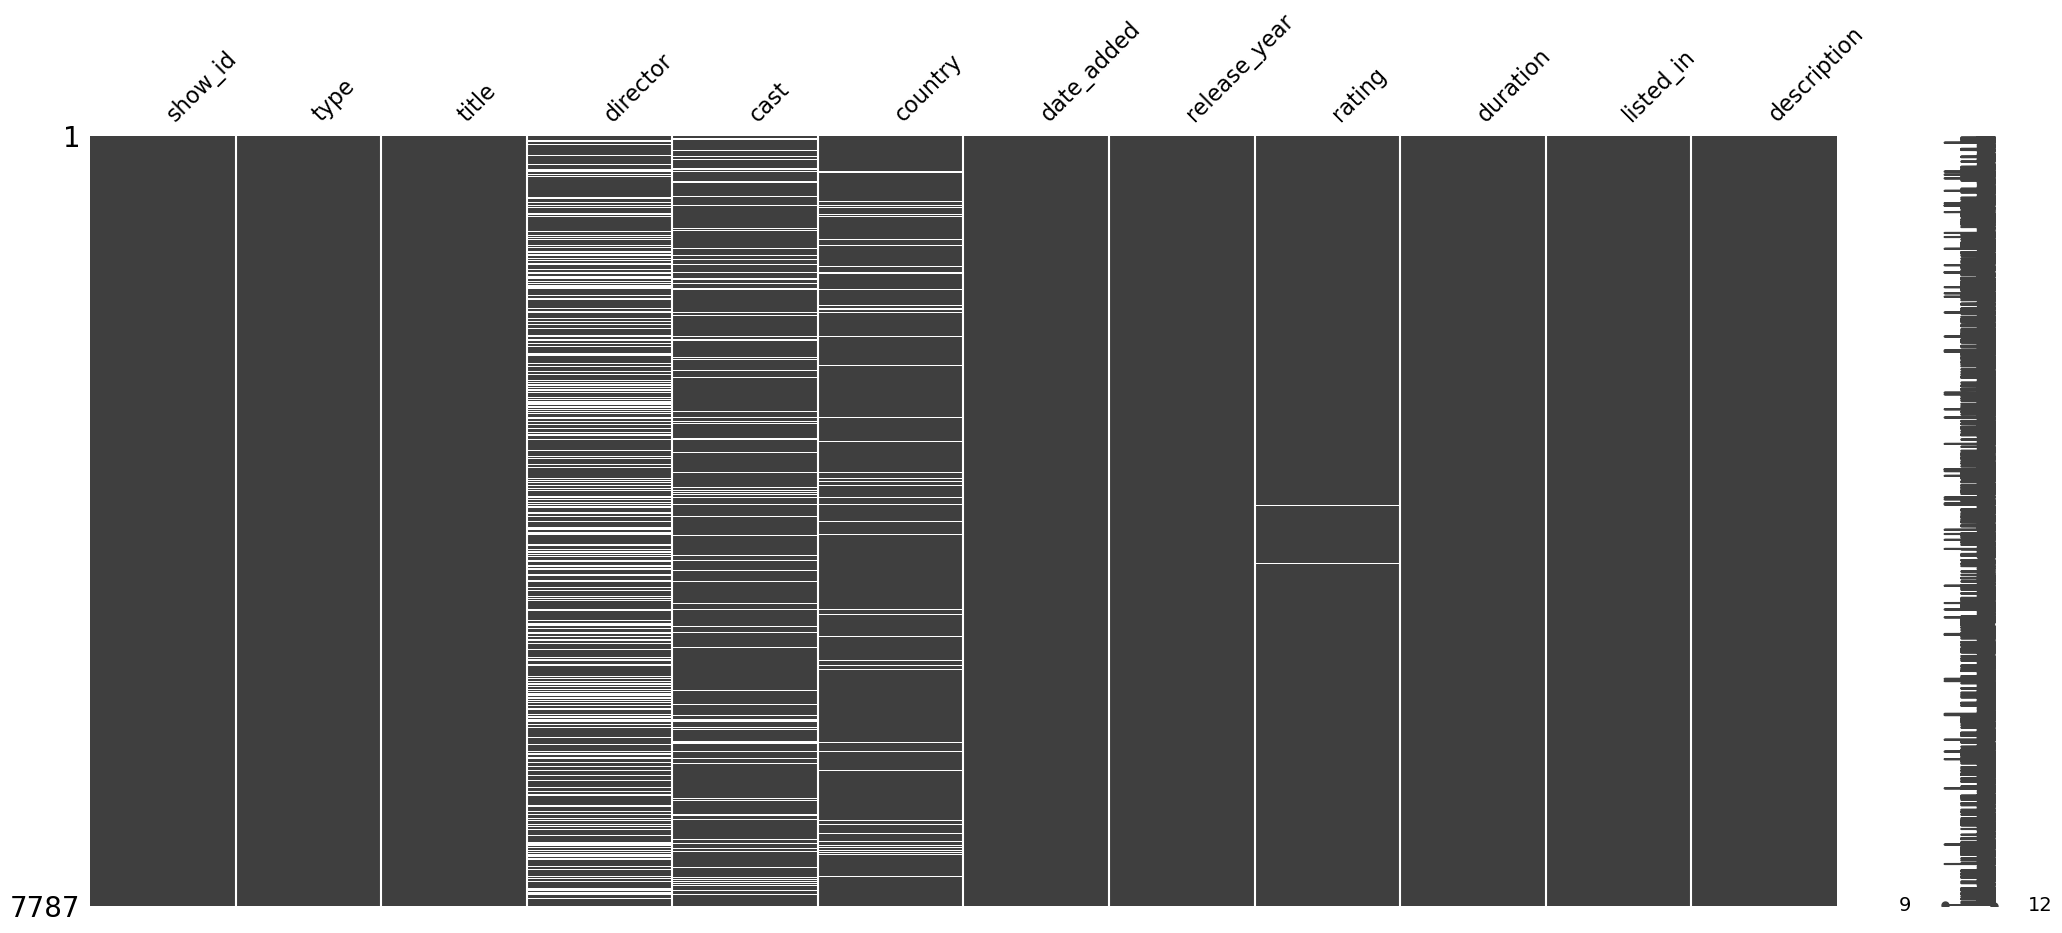

In [15]:
# graphical visualisation of null values
msno.matrix(df)
plt.show()

In [16]:
# Calculate missing values
for i in df.columns:
    null_count = df[i].isnull().sum()
    null_percent = null_count / len(df) * 100
    if null_count > 0:
        print(f"Column '{i}' has {null_count} missing values, which is {null_percent:.2f}% of the df.")

Column 'director' has 2389 missing values, which is 30.68% of the df.
Column 'cast' has 718 missing values, which is 9.22% of the df.
Column 'country' has 507 missing values, which is 6.51% of the df.
Column 'date_added' has 10 missing values, which is 0.13% of the df.
Column 'rating' has 7 missing values, which is 0.09% of the df.


In [17]:
# Calculate missing values
missing_data = []
for col in df.columns:
    null_count = df[col].isnull().sum()
    null_percent = (null_count / len(df)) * 100
    if null_count > 0:  
        missing_data.append({'Column Name': col, 'Number of Missing Values': null_count, 
                             'Percentage of Missing Values': round(null_percent, 2)})

# Create DataFrame
missing_df = pd.DataFrame(missing_data)
missing_df


Column Name  Number of Missing Values  Percentage of Missing Values
0    director                      2389                         30.68
1        cast                       718                          9.22
2     country                       507                          6.51
3  date_added                        10                          0.13
4      rating                         7                          0.09

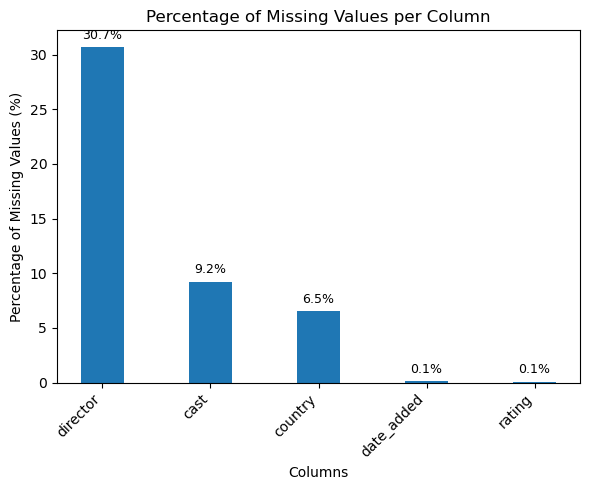

In [18]:
# percentage of missing values
if not missing_df.empty:
    plt.figure(figsize=(6, 5))

    # Reduce the width of the bars by setting the 'width' parameter
    bars = plt.bar(missing_df['Column Name'], missing_df['Percentage of Missing Values'], width=0.4)

    # Remove grid lines
    plt.grid(False)

    # Add value labels on each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=9)

    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values (%)')
    plt.title('Percentage of Missing Values per Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [19]:
# checking for null values
df.duplicated().sum()

0

In [20]:
# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [21]:
# dataset overview summary
pd.DataFrame({
    'Count':df.shape[0],
    'Nulls':df.isnull().sum(),
    'Nulls %':((df.isnull().sum()/df.shape[0])*100).round(2),
    'Cardinality': df.nunique(),    
    'Data type' : df.dtypes,
    'Duplicates' : df.duplicated().sum()
})

Count  Nulls  Nulls %  Cardinality Data type  Duplicates
show_id        7787      0     0.00         7787    object           0
type           7787      0     0.00            2    object           0
title          7787      0     0.00         7787    object           0
director       7787   2389    30.68         4049    object           0
cast           7787    718     9.22         6831    object           0
country        7787    507     6.51          681    object           0
date_added     7787     10     0.13         1565    object           0
release_year   7787      0     0.00           73     int64           0
rating         7787      7     0.09           14    object           0
duration       7787      0     0.00          216    object           0
listed_in      7787      0     0.00          492    object           0
description    7787      0     0.00         7769    object           0

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center"> Data Cleaning</p>
</div>



In [23]:
# missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [24]:
# filling missing values in director, cast and country col and dropping same in data added and rating columns
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [25]:
# checking for null values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [26]:
# converting to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [27]:
df['date_added'].max()

Timestamp('2021-01-16 00:00:00')

In [28]:
df['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [29]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [30]:
# unique value in udration column
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

In [31]:
# Count occurrences of "Season" (case-insensitive)
season_count = df['duration'].str.contains('Season', case=False).sum()

# Count occurrences of "Seasons" (case-insensitive)
seasons_count = df['duration'].str.contains('Seasons', case=False).sum()

print(f"Number of occurrences of 'Season': {season_count}")
print(f"Number of occurrences of 'Seasons': {seasons_count}")

Number of occurrences of 'Season': 2398
Number of occurrences of 'Seasons': 792


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center"> Feature Engineering</p>
</div>



In [34]:
# creating new feature year added and month added
df['year_added'] = df['date_added'].apply(lambda datetime: datetime.year)
df['month_added'] = df['date_added'].apply(lambda datetime: datetime.month)

In [35]:
# dataset information overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int64         
 13  month_added   7770 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 910.5+ KB


In [36]:
# first 5 rows in dataset
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  
0  In a future where the elite inhabit an island ...        2020            8  
1  After a devastating earthquake hits Mexico Cit...        2016           12  
2  When an army recruit is found dead, his fellow...        2018           12  
3  In a postapocalyptic world, rag-doll robots hi...        2017           11  
4  A brilliant group of students become card-coun...        2020            1

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center"> Exploratory Data Analysis</p>
</div>



In [38]:
df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  year_added  month_added  
0  In a future where the elite inhabit an island ...        2020            8  
1  After a devastating earthquake hits Mexico Cit...        2016           12  
2  When an army recruit is found dead, his fellow...        2018           12

# Univariate Analysis

## type

In [40]:
# Calculate the value counts
type_counts = df['type'].value_counts()
type_counts

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

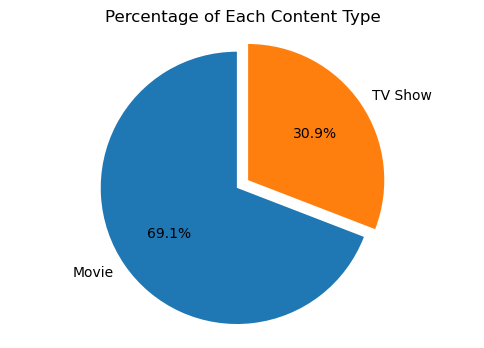

In [41]:
# Extract labels and sizes for the pie chart
labels = type_counts.index
sizes = type_counts.values

# Create the detached pie chart
plt.figure(figsize=(6, 4))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=90, explode=[0.1, 0])
plt.title('Percentage of Each Content Type')
plt.axis('equal')  # Equal  ensures that pie is drawn as a circle.
plt.show()

*  2/3rd (69%) of the content on Netflix are movies and he remaining 1/3rd (33%) are TV Shows

## titles

Iterating through the title column to check if any titles appear more than once. None appears more than onces as also confirmed by the duplicate function.

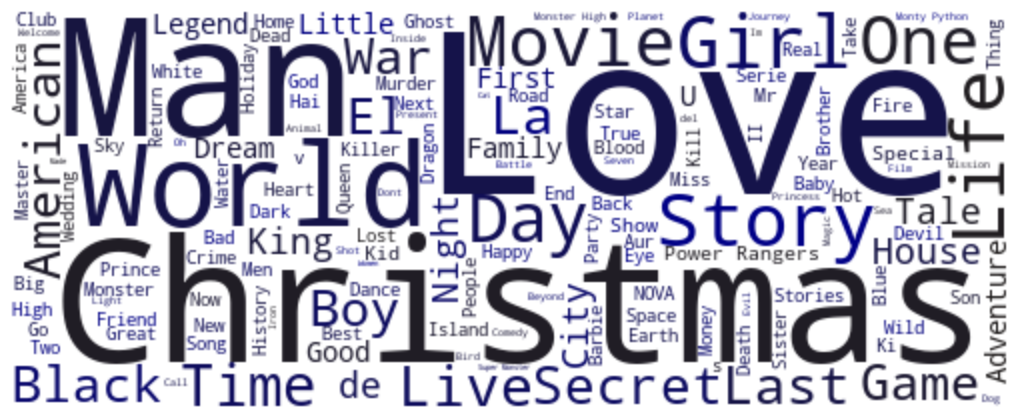

In [45]:
# Custom colour map based on Netflix palette
cm = mpl.colors.LinearSegmentedColormap.from_list("", ['#00008b', '#221f1f'])

# carrying out word cloud on title column
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Create the word cloud without a mask
wordcloud = WordCloud(background_color='white', width=500, height=200,  colormap=cm, max_words=150).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## director

In [47]:
df['director'].value_counts()

director
Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: count, Length: 4048, dtype: int64

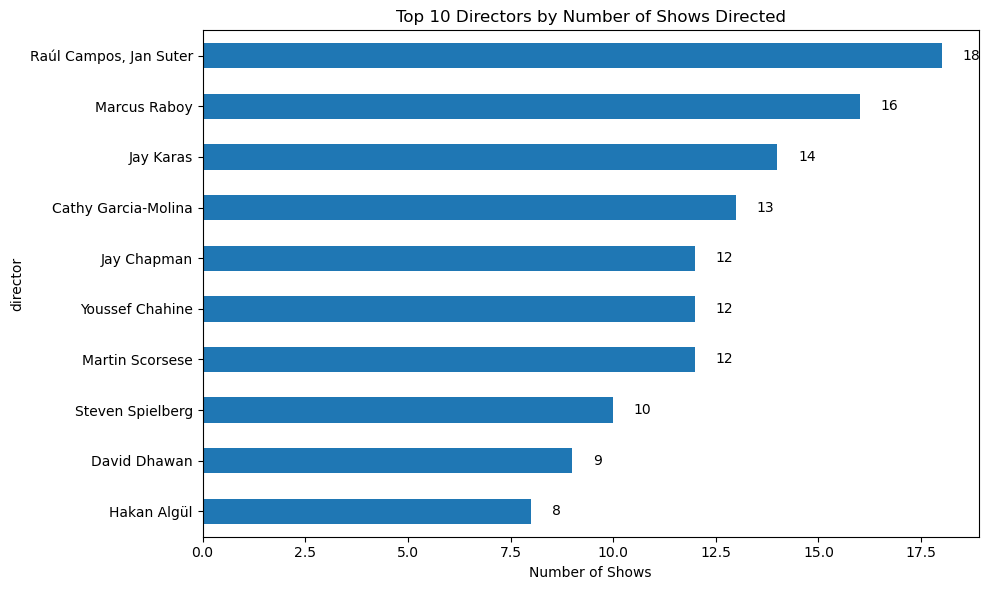

In [48]:
# Top 10 directors in the dataset (excluding 'Unknown')
top_directors = df[~(df['director'] == 'Unknown')]['director'].value_counts().nlargest(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = top_directors.plot(kind='barh')

plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Number of Shows')
plt.gca().invert_yaxis()  # So the highest value appears at the top

# Adding data labels
for i, v in enumerate(top_directors.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()


Raúl Campos, Jan Suter with 18 movies hold the top spot as the most prolific director in the dataset, followed by Marcus Raboy with 15 movies and1 TV show andJay Karas with 14 movies, making them the second and third most frequent directors, respectively. 

## country

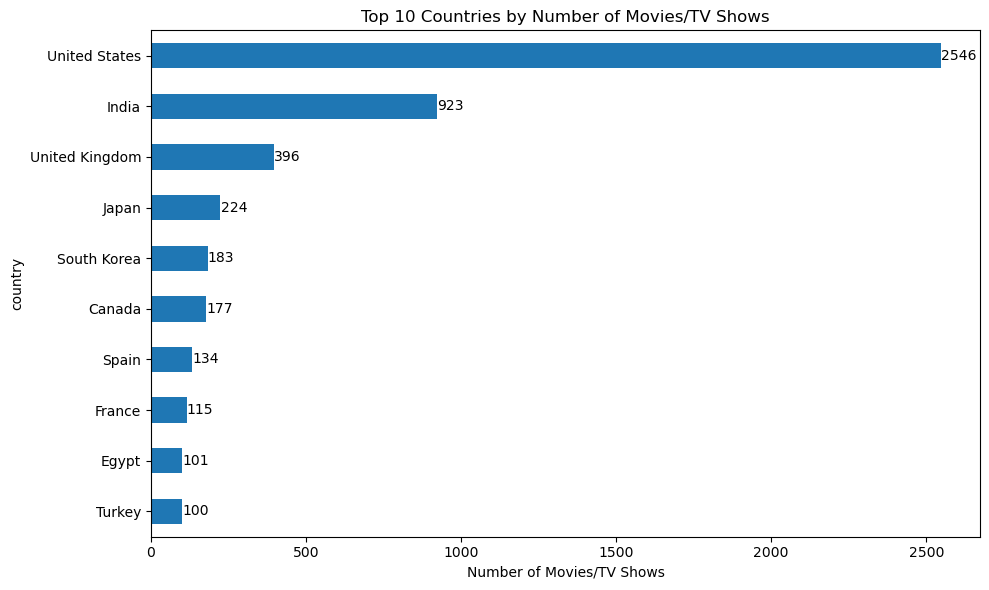

In [51]:
# Top 10 countries with the highest number of movies/TV shows in the dataset
top_countries = df[~(df['country'] == 'Unknown')]['country'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
bars = top_countries.plot(kind='barh')
plt.title('Top 10 Countries by Number of Movies/TV Shows')
plt.xlabel('Number of Movies/TV Shows')
plt.gca().invert_yaxis()  # Highest at the top

# Adding data labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()


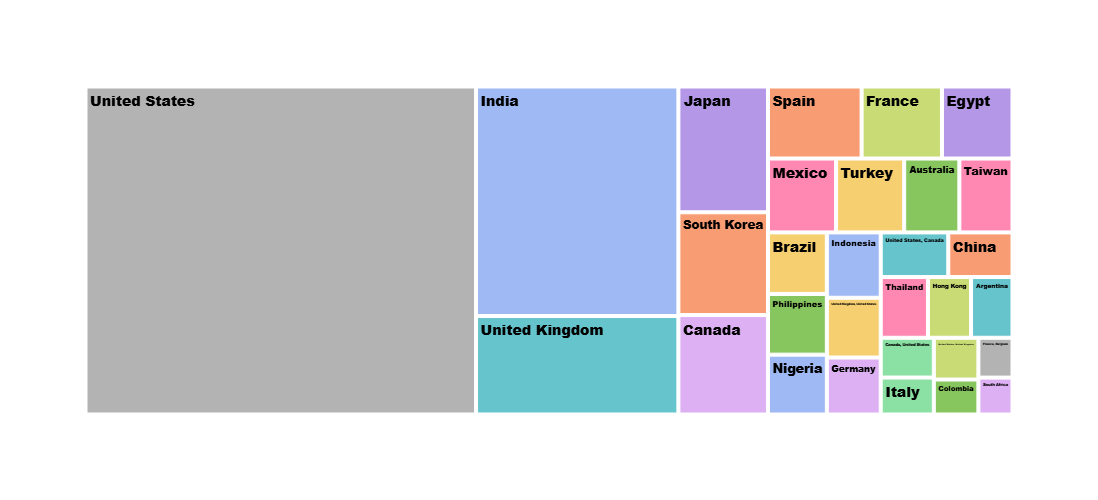

In [52]:
# Step 1: Group by country and count occurrences (excluding 'Unknown')
top_countries = df[df['country'] != 'Unknown']['country'].value_counts().nlargest(30).index

# Step 2: Filter the dataframe to include only top 30 countries and exclude 'Unknown'
df_top30 = df[df['country'].isin(top_countries) & (df['country'] != 'Unknown')]

# Step 3: Create the treemap
fig = px.treemap(df_top30, path=['country'], color='country', hover_name='country', height=500,
                 color_discrete_sequence=px.colors.qualitative.Pastel)

# Step 4: Update text to bold style
fig.update_traces(
    texttemplate='%{label}',
    textfont=dict(size=14, color='black', family='Arial Black')  # Set bold font family
)

# Display the treemap
fig.show()


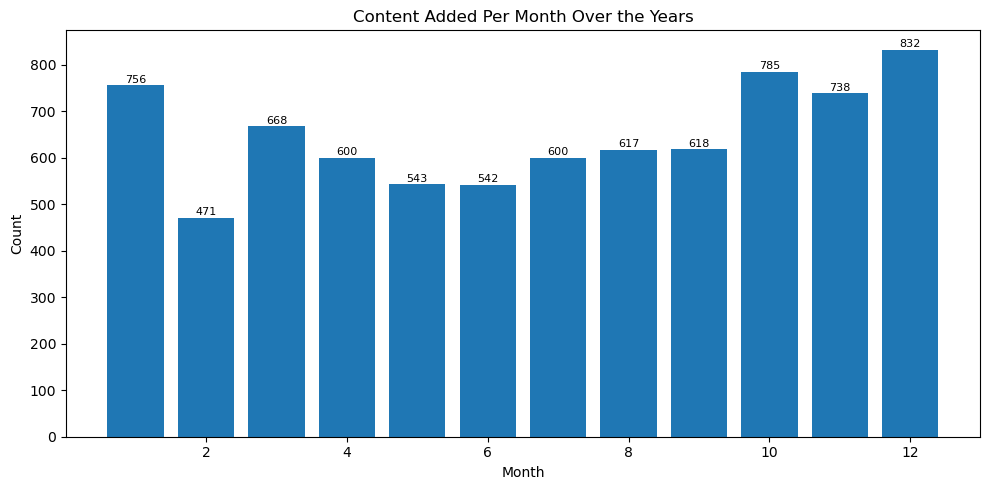

In [53]:
# counts of content added each month
month_counts = df['month_added'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values)

# Customize the plot
plt.title('Content Added Per Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Count')  # Added y-label for clarity

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(10, 10))
squarify.plot(sizes = top_countries.values, label = top_countries.index, color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 10 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
This value increases to about 78% for top ten countries

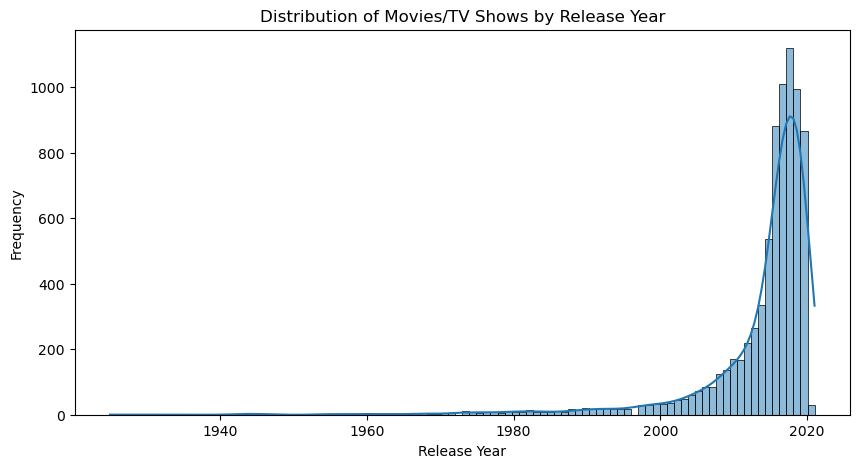

In [56]:
# Distribution of movies/TV shows by release year
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=100, kde=True)  # Added bins and KDE for better visualization
plt.title('Distribution of Movies/TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

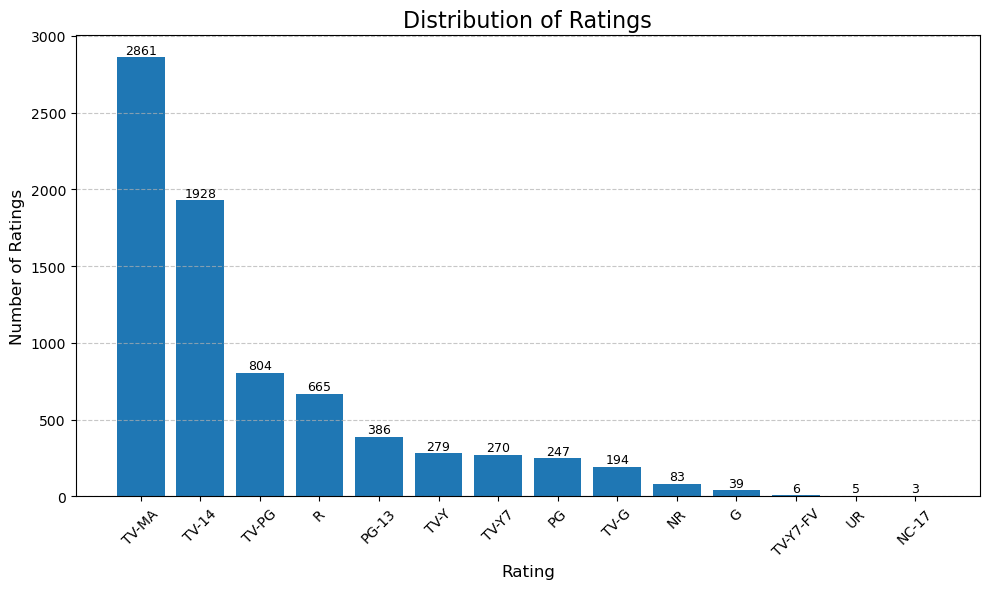

In [57]:
# Count of content per rating
rating_counts = df['rating'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

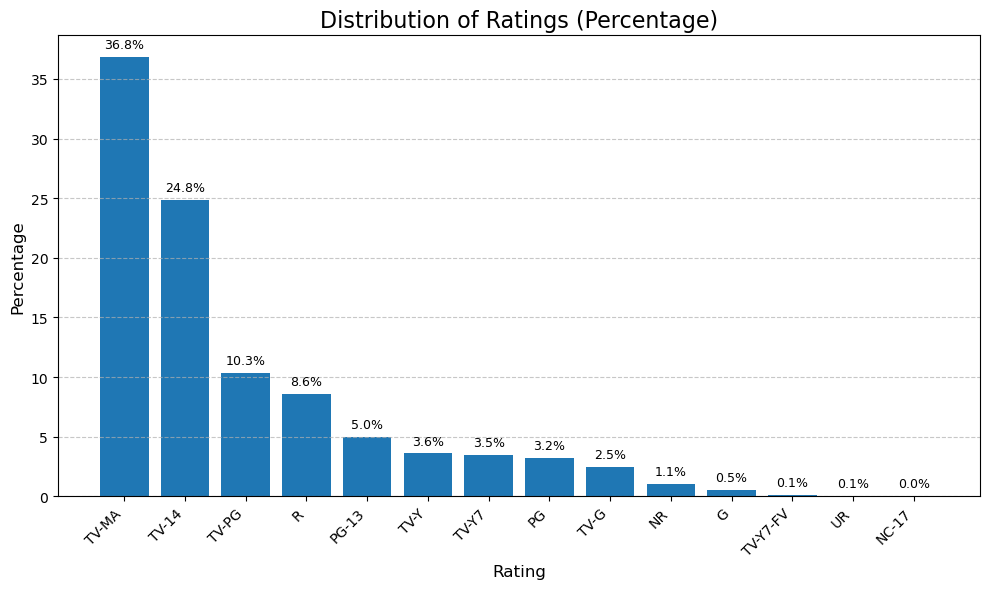

In [58]:
# Calculate percentages
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_percentages.index, rating_percentages.values)

# Customize the plot
plt.title('Distribution of Ratings (Percentage)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [59]:
# frequency of ratings
df['rating'].value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [60]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

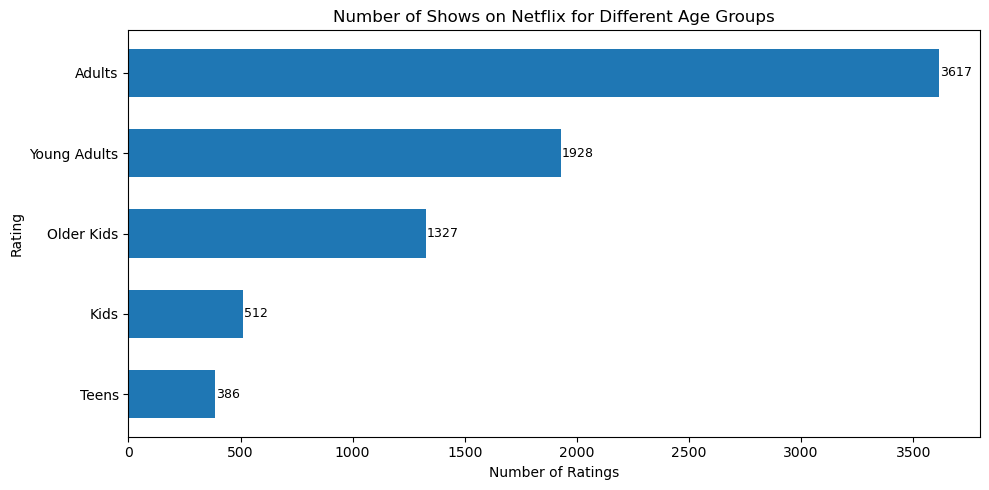

In [61]:
# Get the rating counts in descending order
rating_counts = df['rating'].value_counts().sort_values(ascending=True)

# Plot horizontal bar chart with reduced bar thickness
plt.figure(figsize=(10, 5))
bars = plt.barh(rating_counts.index, rating_counts.values, height=0.6)

# Bold title and axis labels
plt.title('Number of Shows on Netflix for Different Age Groups')
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')  # Optional: can remove if not needed

# Make tick labels bold
#plt.xticks(fontweight='bold')
#plt.yticks(fontweight='bold')

# Add bold data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, str(width),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [62]:
# Calculate the proportion of adults
adult_proportion = (df['rating'].value_counts(normalize=True)['Adults']) * 100
adult_proportion

print(f"The proportion of adults is: {adult_proportion:.2f}%")

The proportion of adults is: 46.55%


In [63]:
order = df.groupby('rating')['rating'].count().sort_values(ascending=False).reset_index(name='rating_value')
rating_order = list(order['rating_value'])

In [64]:
order

rating  rating_value
0        Adults          3617
1  Young Adults          1928
2    Older Kids          1327
3          Kids           512
4         Teens           386

# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

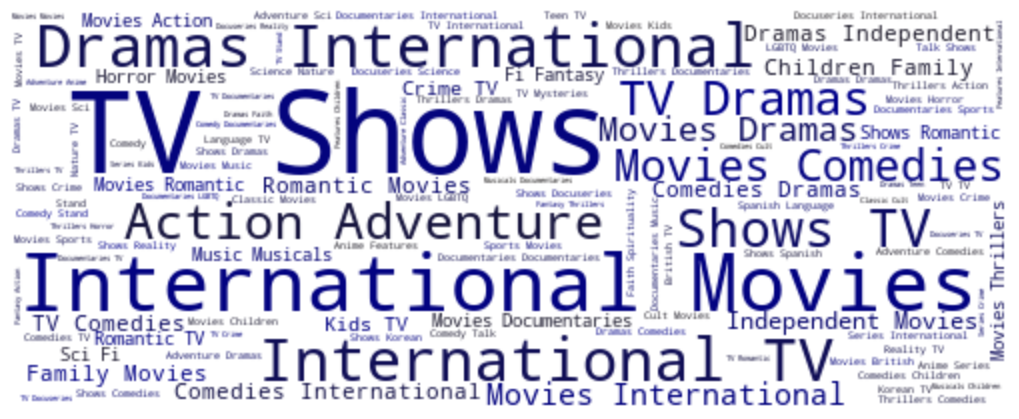

In [66]:

# Assuming df is your dataframe and 'title' is the column you're using for the word cloud
text = str(list(df['listed_in'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Create the word cloud without a mask
wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cm, max_words=150).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Over the years a greater number of shows were added in the months of October, November, December, and January

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int64         
 13  month_added   7770 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 910.5+ KB


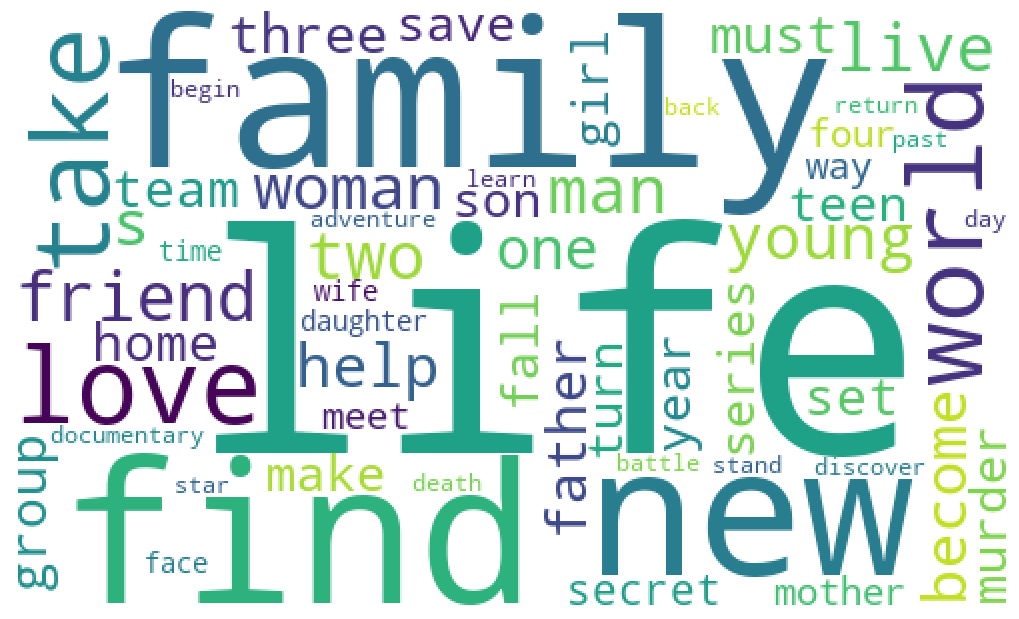

In [69]:
# Building a wordcloud for the movie descriptions
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Bivariate Analysis

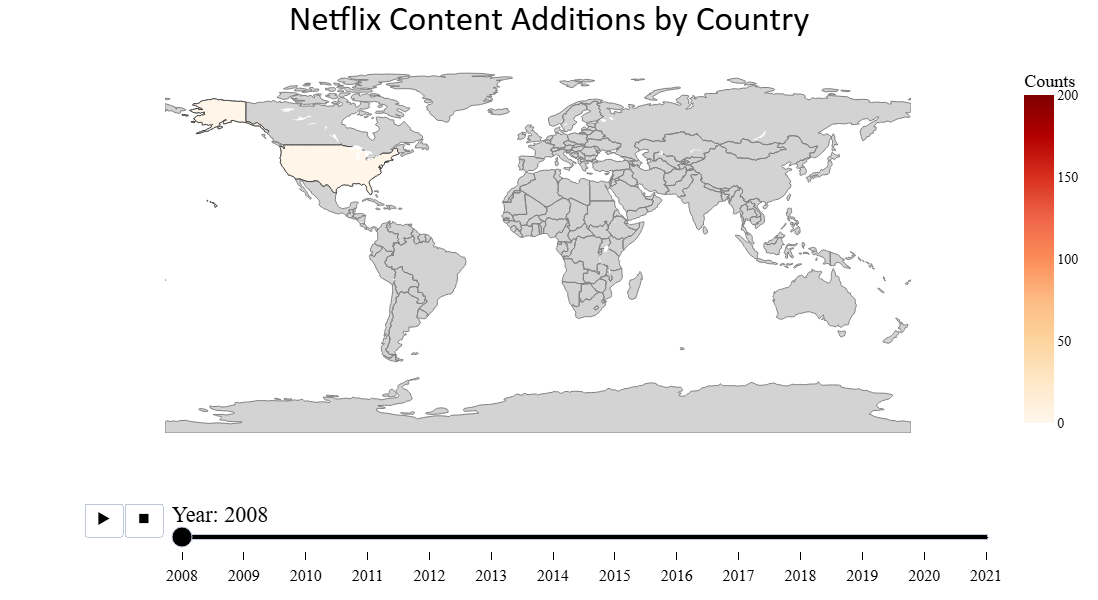

In [71]:
# Group by year and country
year_country2 = df.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(
    year_country2,
    locations="country",
    color="counts",
    locationmode='country names',
    animation_frame='year_added',
    range_color=[0, 200],
    color_continuous_scale=px.colors.sequential.OrRd
)

# Update layout
fig.update_layout(
    title={
        'text': 'Netflix Content Additions by Country',
        'font': {'size': 35, 'family': 'Calibri', 'color': 'black'},
        'x': 0.5,
        'xanchor': 'center'
    },
    width=1000,
    height=600,
    font=dict(
        size=16,
        family='Calibri',
        color='black'
    ),
    coloraxis_colorbar=dict(
        title='Counts',
        title_font=dict(size=18, family='Calibri Bold', color='black'),
        tickfont=dict(size=14, family='Calibri Bold', color='black')
    ),
    geo=dict(
        bgcolor='white',
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        landcolor='lightgray',
        showcountries=True,
        countrycolor='gray'
    ),
    sliders=[dict(
        active=0,
        currentvalue=dict(
            prefix="Year: ",
            font=dict(size=22, family='Calibri Bold', color='black')
        ),
        font=dict(size=16, family='Calibri Bold', color='black'),  # Make tick mark labels bold
        bgcolor='black',  # Background color of the slider
        tickcolor='black',
        ticklen=8
    )]
)

fig.show()


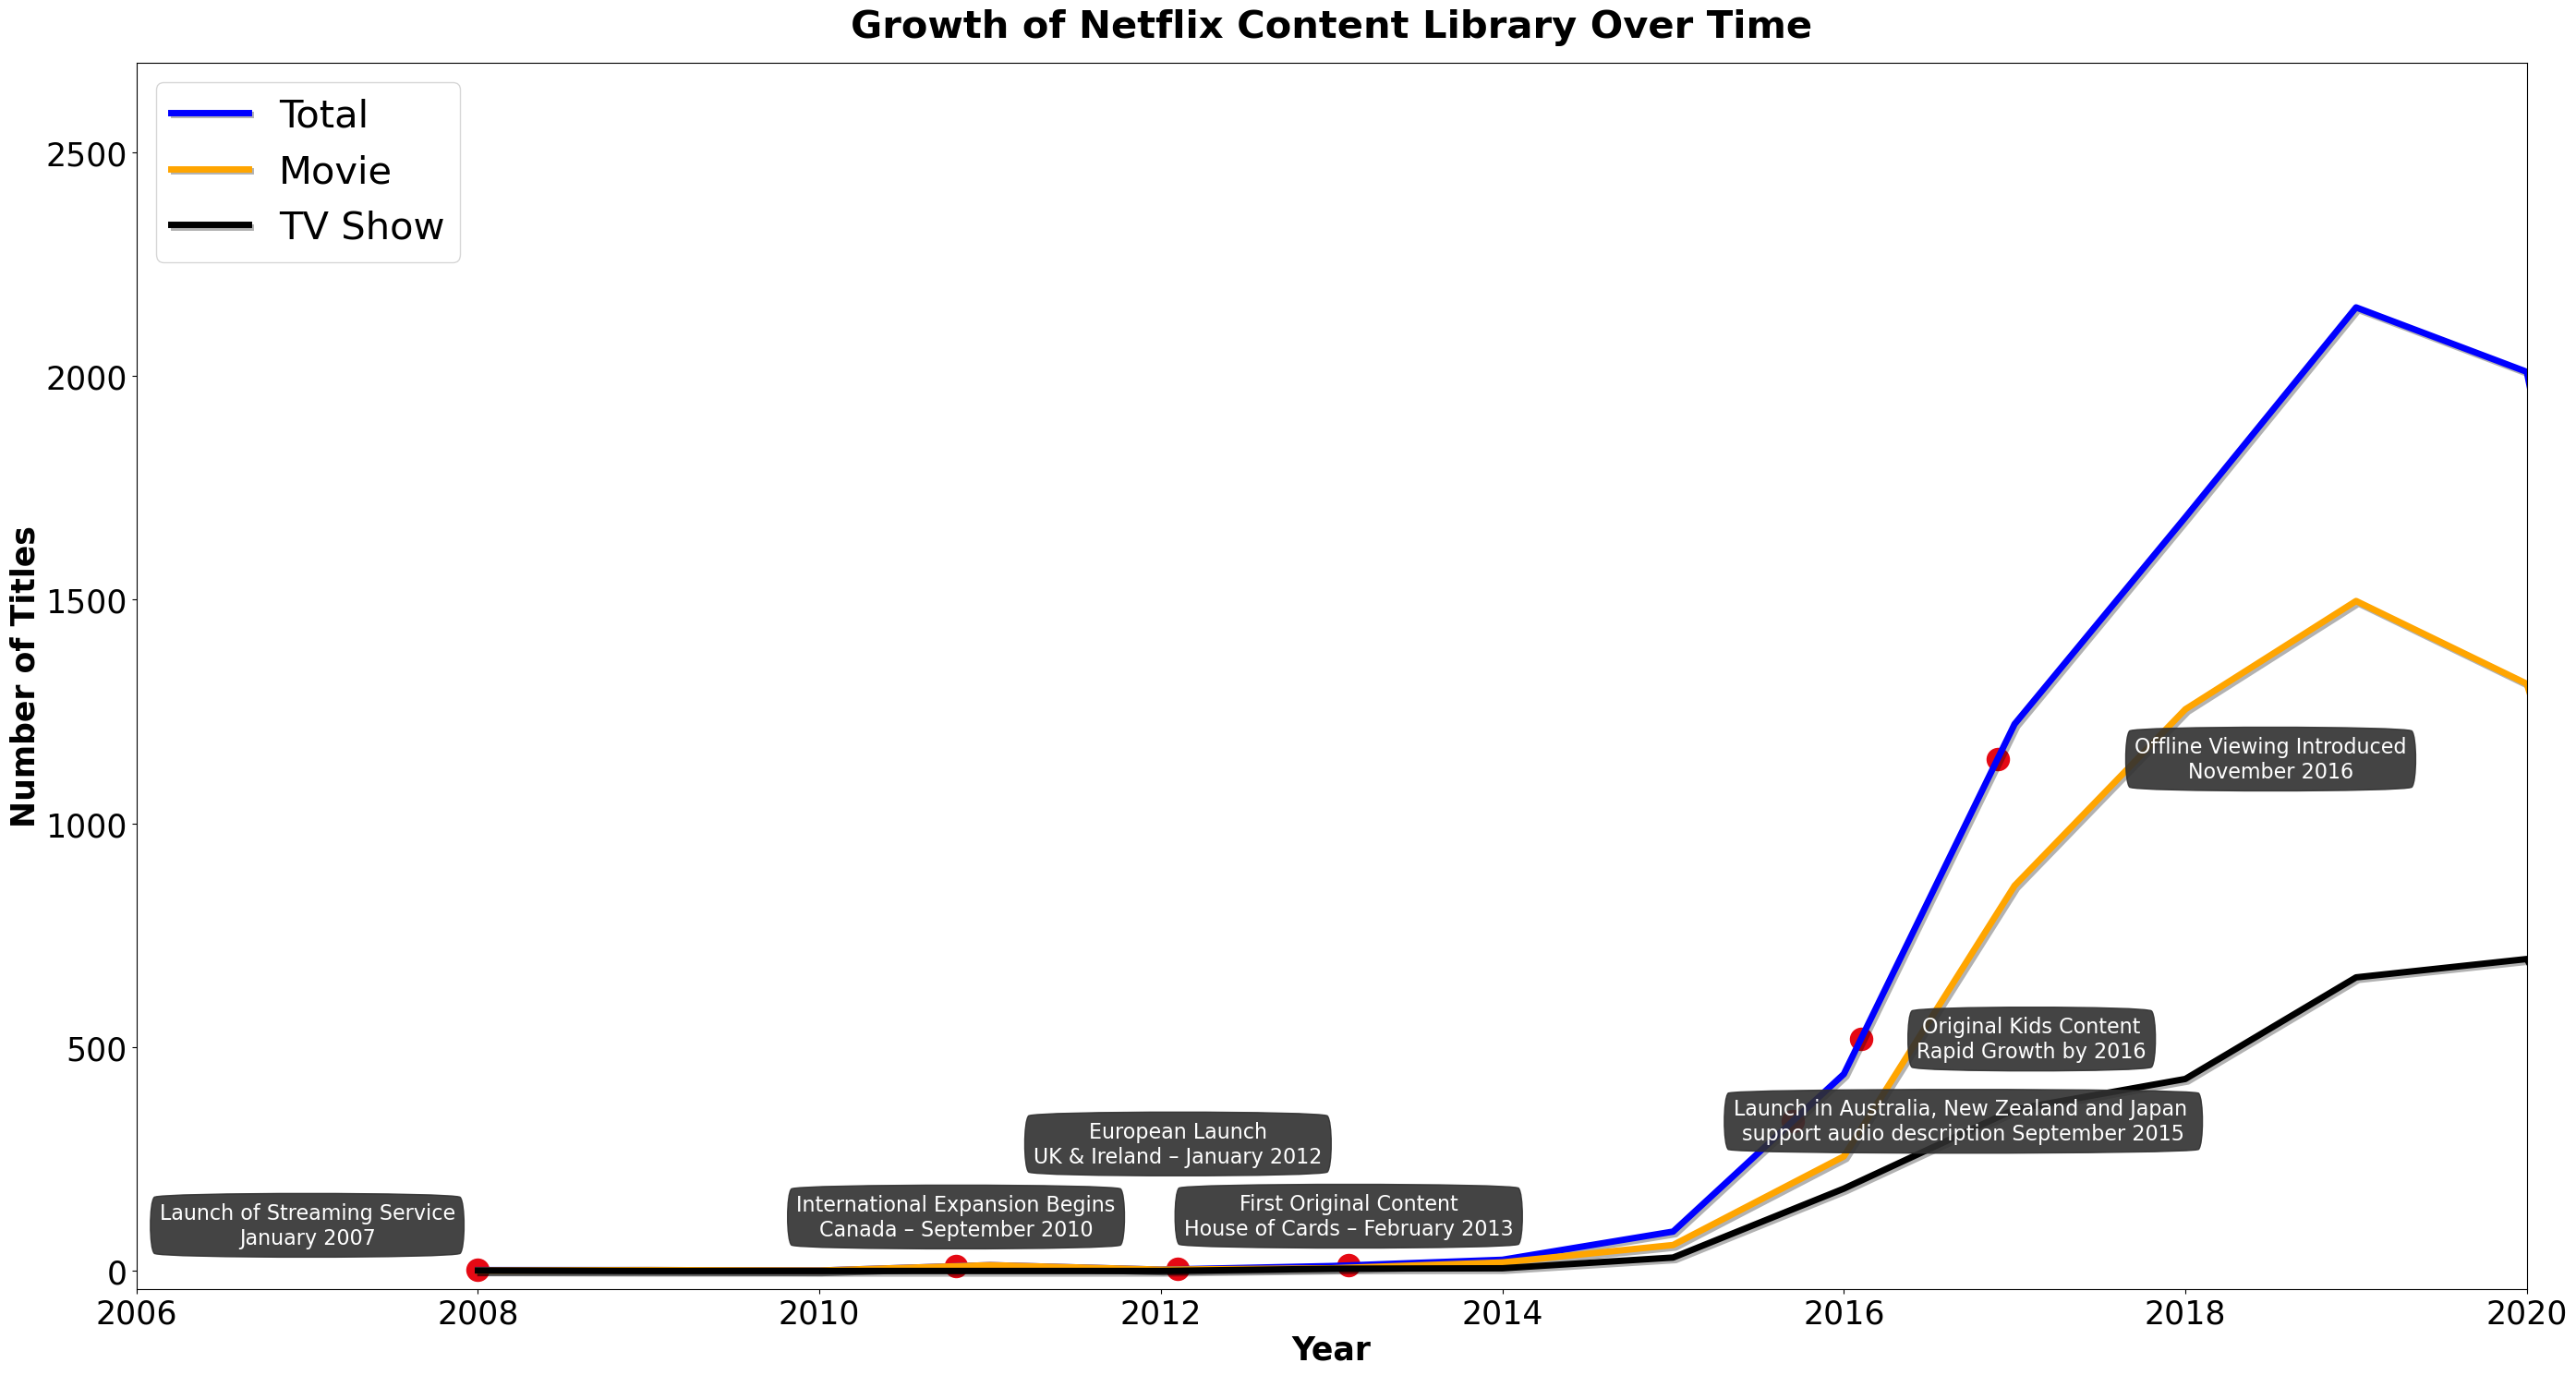

In [72]:
# Data prep
year_data = df['year_added'].value_counts().sort_index().loc[:2022]
type_data = df.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2022]

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(28, 15))

# Plot total, movies and TV shows
ax.plot(year_data.index, year_data, color="blue", linewidth=5, label='Total',
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='orange', linewidth=5, label='Movie',
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='black', linewidth=5, label='TV Show',
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])

# Set axis limits
ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

# Add axis labels
ax.set_xlabel("Year", fontsize=25, fontweight='bold')
ax.set_ylabel("Number of Titles", fontsize=25, fontweight='bold')

# Annotated events
t = [2008, 2010.8, 2012.1, 2013.1, 2015.7, 2016.1, 2016.9]
events = [
    "Launch of Streaming Service\nJanuary 2007",
    "International Expansion Begins\nCanada – September 2010",
    "European Launch\nUK & Ireland – January 2012",
    "First Original Content\nHouse of Cards – February 2013",
    "Launch in Australia, New Zealand and Japan \nsupport audio description September 2015",
    "Original Kids Content\nRapid Growth by 2016",
    "Offline Viewing Introduced\nNovember 2016"
]
up_down = [100, 110, 280, 110, 0, 0, 0]
left_right = [-1, 0, 0, 0, 1, 1, 1.6]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    y_val = year_data[int(t_i)] * (int(t_i + 1) - t_i) + year_data[int(t_i) + 1] * (t_i - int(t_i))
    ax.annotate(event_i,
                xy=(t_i + lr_i, y_val + ud_i),
                xytext=(0, 0),
                textcoords='offset points',
                va="center",
                ha="center",
                color="w",
                fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    ax.scatter(t_i, y_val, color='#E50914', s=300)

# Axis labels again (redundant but harmless)
ax.set_xlabel("Year", fontsize=25, fontweight='bold')
ax.set_ylabel("Number of Titles", fontsize=25, fontweight='bold')

# Title
ax.set_title("Growth of Netflix Content Library Over Time", fontsize=30, fontweight='bold', pad=20)

# Tick label sizes
ax.tick_params(axis='both', which='major', labelsize=25)

# Legend
ax.legend(loc='upper left', fontsize=30)

# Background
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


In [73]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

# Helper column for various plots
df['count'] = 1

#data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]


df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]


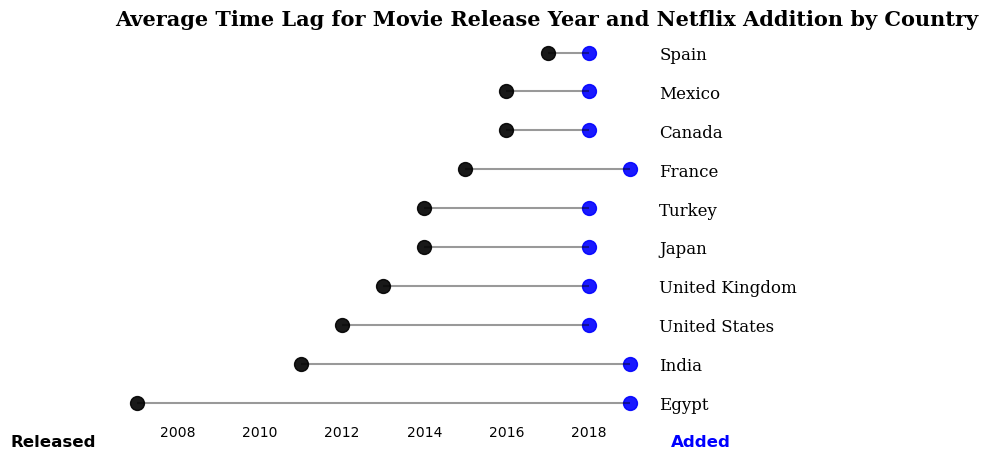

In [74]:
# creating a df for movies
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

# Helper column for various plots
df['count'] = 1

# Extract first country only
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0] if pd.notna(x) else 'Unknown')

# Remove 'Unknown' countries
df_movies = df_movies[df_movies['first_country'] != 'Unknown']

# Corrected code for Movies
data = df_movies.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']

df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round()

# Reorder by release year
ordered_df = loli.sort_values(by='release_year')
ordered_df_rev = loli.sort_values(by='release_year', ascending=False)
my_range = range(1, len(loli.index) + 1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'Average Time Lag for Movie Release Year and Netflix Addition by Country', 
         fontsize=15, fontweight='bold', fontfamily='serif')

plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='black', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='black', s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='blue', s=100, alpha=0.9, label='Average added date')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname="serif", fontsize=12)

plt.text(ordered_df['release_year'].min() - 1, 0, 'Released', fontweight='bold', fontsize=12, ha='right', va='center')
plt.text(ordered_df['year_added'].max() + 1, 0, 'Added', fontweight='bold', fontsize=12, color='blue', ha='left', va='center')

plt.show()


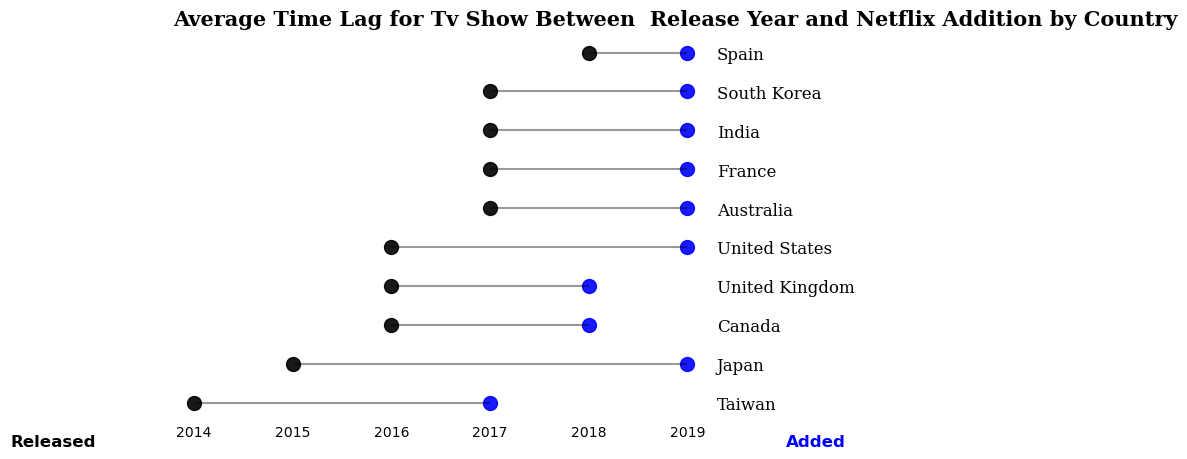

In [75]:
# creating a df for tv show
df_tv = df_tv[df_tv['first_country'] != 'Unknown']

# Corrected code for TV Shows
data = df_tv.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']

df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round()

# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')
ordered_df_rev = loli.sort_values(by='release_year',ascending=False)
my_range = range(1, len(loli.index)+1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'Average Time Lag for Tv Show Between  Release Year and Netflix Addition by Country', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='black', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='black', s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='blue', s=100, alpha=0.9, label='Average added date')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis=u'both', which=u'both', length=0)
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname="serif", fontsize=12)

plt.text(ordered_df['release_year'].min() - 1, 0, 'Released', fontweight='bold', fontsize=12, ha='right', va='center')
plt.text(ordered_df['year_added'].max() + 1, 0, 'Added', fontweight='bold', fontsize=12, color='blue', ha='left', va='center')

plt.show()


Conclusion

Data visualisation aid in identifying trend and patterns otherwise not visible to the eye. This is evident in the analysis of Netflix dataset. Netflix transformed from a 1997 DVD rental service into a global streaming leader by 2021 through strategic shifts and data-driven decisions. Its pivot to streaming in 2007 laid the groundwork for its expansion, which accelerated with international launches starting in 2010 and a crucial move into original content production in 2013 with House of Cards. This led to a sharp increase in content additions, peaking between 2015 and 2017.

The platform contents feature movies (nearly 70%), often centred on themes of love and family, with seasonal content spikes from October to January. The United States remains the primary source of content, followed by India and the UK. While content availability lags exist, varying significantly by country (e.g., long delays for movies in Egypt and India, but quicker TV show access in South Korea), Netflix's journey showcases its ambition, adaptability, and ongoing influence on global entertainment
